In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape #6000 images in the set with each 28x28 pixels

(60000, 28, 28)

In [7]:
len(train_labels) #Likewise, there are 60,000 labels in the training set:

60000

In [8]:
train_labels  #Each label is an integer between 0 and 9:

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape   #There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

(10000, 28, 28)

In [10]:
len(test_labels)  #test set contains 10,000 images labels:

10000

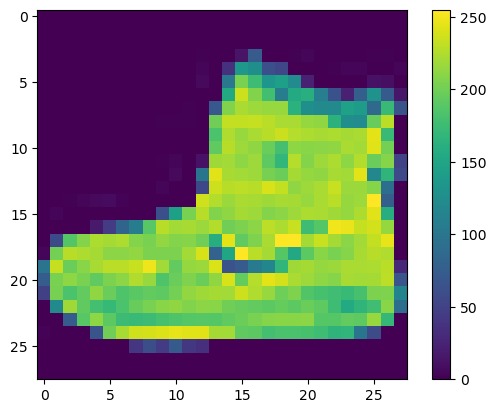

In [12]:
#preprocess the data

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
#divide the values by 255.
#It's important that the training set and the testing set be preprocessed in the same way
train_images = train_images / 255.0
test_images = test_images / 255.0

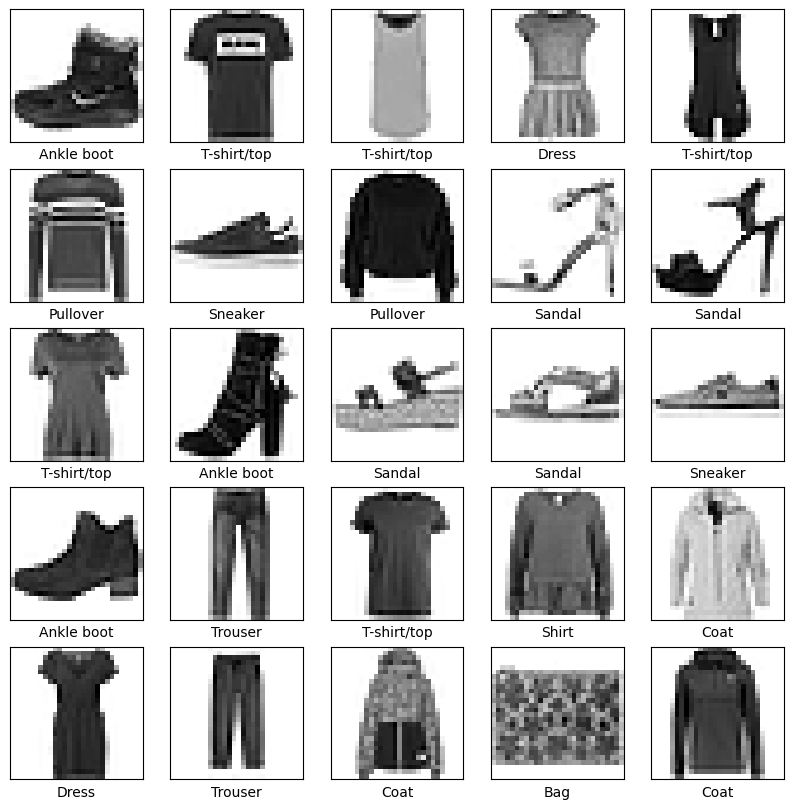

In [21]:
#display the first 25 images from the training set and display the class name below each image.
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)  #removes grid lines
    plt.imshow(train_images[i], cmap=plt.cm.binary)  #Displays the i-th image from the train_images array.
    plt.xlabel(class_names[train_labels[i]])    #Adds a label (e.g., 'Sneaker', 'Shirt') below each image.
plt.show()

In [22]:
model = tf.keras.Sequential([         #creates a linear stack of layers — one after the other.
    tf.keras.layers.Flatten(input_shape=(28,28)),   #Converts the 2D image into a 1D array of 784 values (28×28 = 784).
    tf.keras.layers.Dense(128, activation='ReLU'),  #ReLU (Rectified Linear Unit) adds non-linearity: ReLU(x)=max⁡(0,x))
    tf.keras.layers.Dense(10)    #Another fully connected layer, but with 10 neurons.
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
#Training the model
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5013 - accuracy: 0.8252
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3786 - accuracy: 0.8639
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3393 - accuracy: 0.8768
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3164 - accuracy: 0.8841
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2967 - accuracy: 0.8918
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2832 - accuracy: 0.8945
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2711 - accuracy: 0.8998
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2564 - accuracy: 0.9042
Epoch 9/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2479 - accuracy: 0.9085
Epoch 10/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.239

In [25]:
#Next, compare how the model performs on the test dataset:
test_loss, test_acc = model.evaluate(test_images, test_labels,verbose=2)
print('\n Test accuracy:', test_acc)

313/313 - 1s - loss: 0.4065 - accuracy: 0.8821 - 853ms/epoch - 3ms/step

 Test accuracy: 0.882099986076355


In [26]:
probablity_model =tf.keras.Sequential([model, tf.keras.layers.Softmax()])   #Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.
predictions = probablity_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [27]:
print(predictions[0])   #the model has predicted the label for each image in the testing set.

[5.51302276e-13 8.02337719e-16 4.54334096e-12 6.54008030e-15
 3.07480530e-16 1.11332845e-07 1.44568280e-09 3.35131408e-05
 1.11027472e-11 9.99966383e-01]


In [28]:
print(np.argmax(predictions[0]))

9


In [29]:
print(test_labels[0])

9


In [43]:
#Graph this to look at the full set of 10 class predictions.
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)


In [31]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])

    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


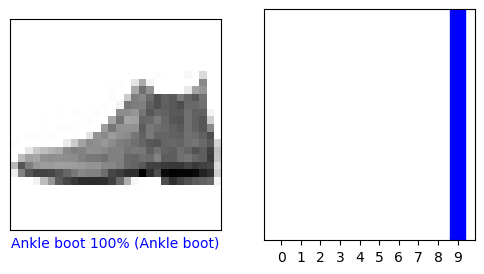

In [42]:
#Correct prediction labels are blue and incorrect prediction labels are red
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

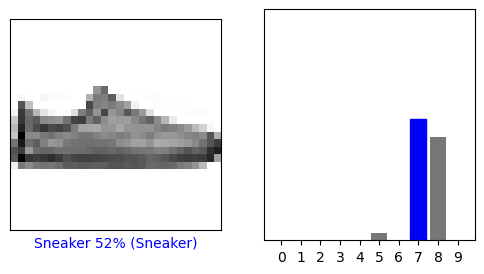

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

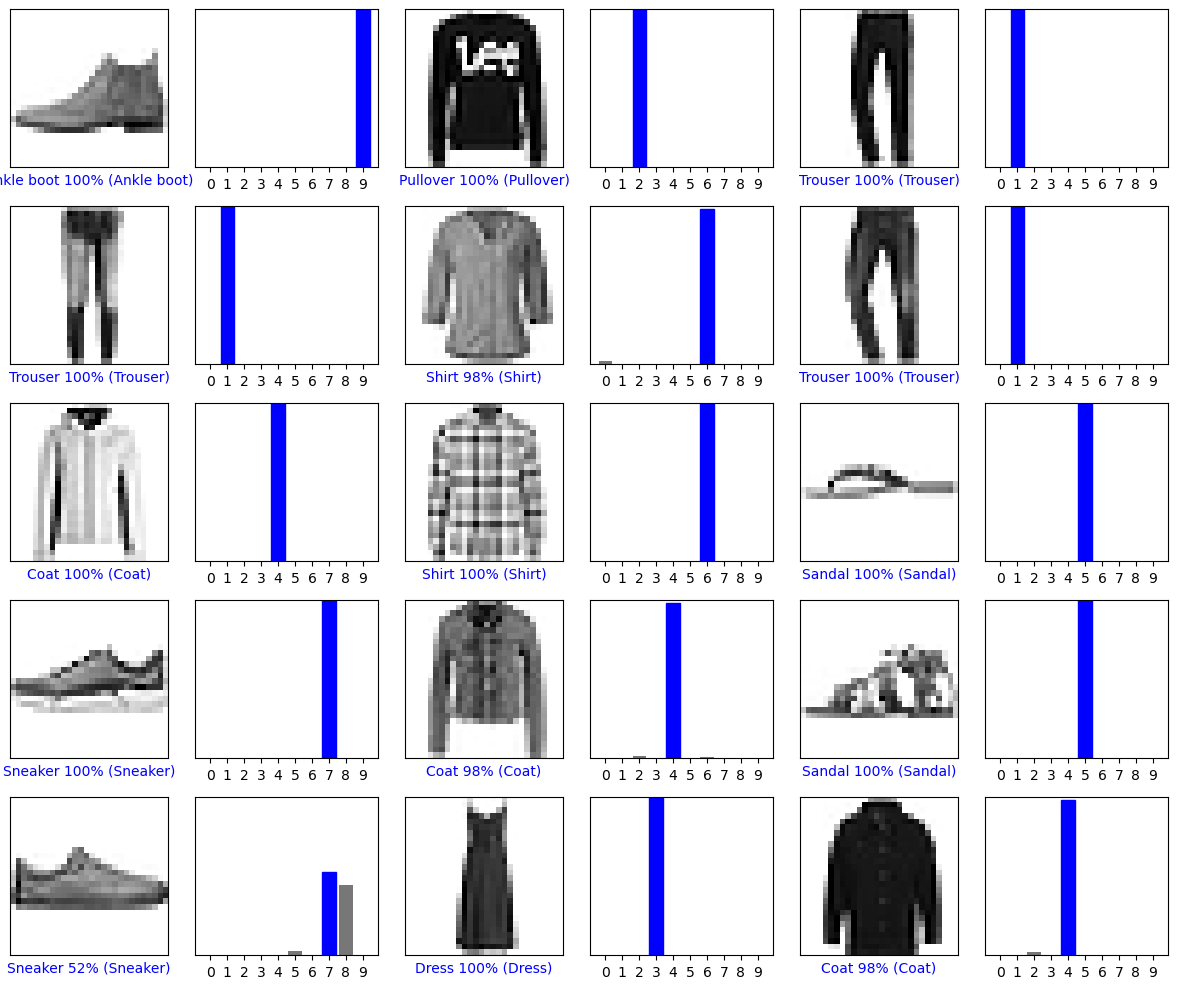

In [44]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()


In [37]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [38]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [40]:
#Now predict the correct label for this image:
predictions_single = probablity_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 38ms/step
[[2.0589439e-05 8.6763184e-16 9.9887818e-01 9.4494251e-18 1.0949150e-03
  1.5536426e-19 6.3087277e-06 3.4230160e-21 4.0679029e-17 2.3417491e-22]]


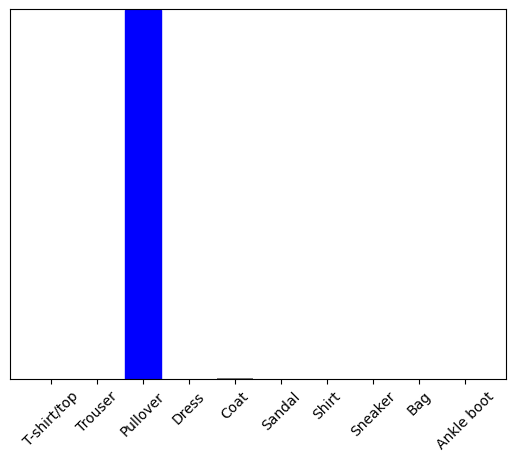

In [41]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()